In [1]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [29]:
len(x_train)

404

In [4]:
layer_sizes = (100)
alpha = 0.0001 # alpha used by L2 regularization
batch_size = 10
step_size = 0.0000001


constant_model = MLPRegressor(solver="sgd", batch_size=batch_size, learning_rate_init=step_size)
adam_model = MLPRegressor(solver="adam", batch_size=batch_size)


In [5]:
def partial_train_loop(model: sklearn.neural_network._multilayer_perceptron.MLPRegressor, n_epochs: int, train_data:np.ndarray, train_labels:np.ndarray, test_data:np.ndarray, test_labels:np.ndarray):
    errors = []
    losses = []
    for epoch in range(n_epochs):
        model.partial_fit(train_data, train_labels)
        preds = model.predict(test_data)
        errors.append(mean_absolute_error(test_labels, preds))
        losses.append(model.loss_)


    return model, errors, losses

In [6]:
mod, errs, loss = partial_train_loop(constant_model, 50, x_train, y_train, x_test, y_test)

## altering constant step size

<ipython-input-63-61a0dbc2ea77>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-63-61a0dbc2ea77>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-63-61a0dbc2ea77>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

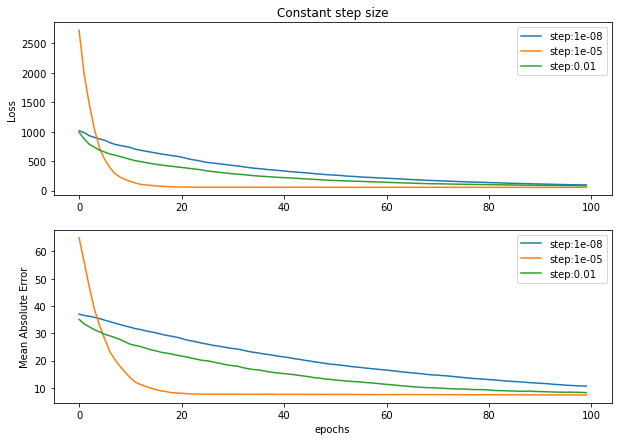

In [63]:
step_sizes = [1e-8, 1e-5, 0.01]
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('step size',figsize=[10,7])
for step in step_sizes:
    constant_model = MLPRegressor(solver="sgd",  learning_rate_init=step_size, momentum=0)

    mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.ylabel('Loss')
    plt.title("Constant step size")
    plt.plot(range(len(loss)), loss, label = f"step:{step}")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel("epochs")
    plt.ylabel('Mean Absolute Error')
    plt.plot(range(len(errs)), errs, label = f"step:{step}")
# plt.title("mae")
plt.legend()


## constant step batch size

<ipython-input-64-e86c0892850e>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-64-e86c0892850e>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-64-e86c0892850e>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

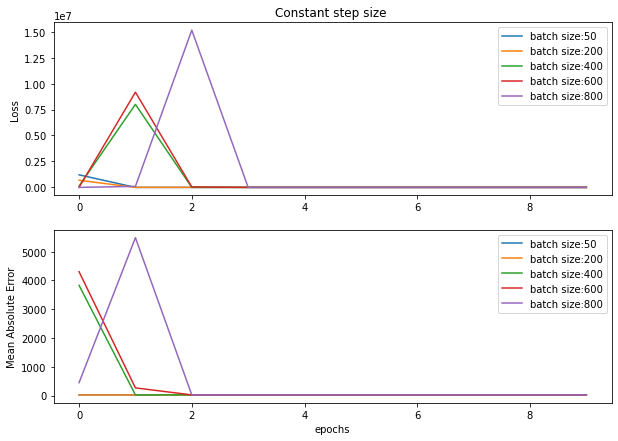

In [64]:
batch_sizes = [50, 200, 400, 600, 800] # default = 200
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('Batch Size Constant Step',figsize=[10,7])
for batch in batch_sizes:
    constant_model = MLPRegressor(solver="sgd", batch_size=batch, learning_rate_init=1e-4, momentum=0)

    mod, errs, loss = partial_train_loop(constant_model, 10, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    # plt.xlabel("epochs")
    plt.ylabel('Loss')
    plt.title("Constant step size ")
    plt.plot(range(len(loss)), loss, label = f"batch size:{batch}")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel("epochs")
    plt.ylabel('Mean Absolute Error')
    plt.plot(range(len(errs)), errs, label = f"batch size:{batch}")

plt.legend()


## adam alpha

<ipython-input-14-8dfc9f298645>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-14-8dfc9f298645>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-14-8dfc9f298645>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

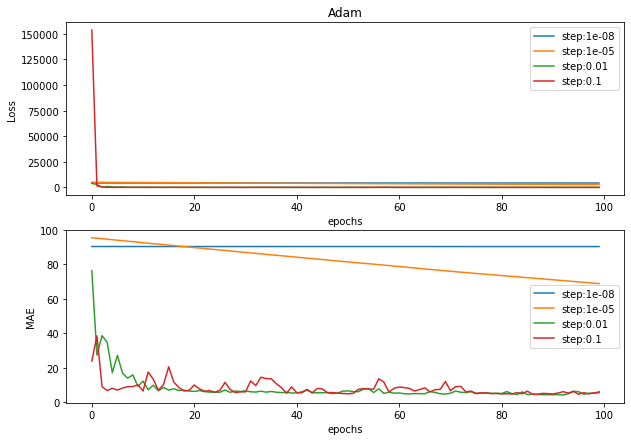

In [14]:
step_sizes = [1e-8, 1e-5, 0.01, 0.1 ]
plt.figure(figsize=[10,7])
for step in step_sizes:
    adam_model = MLPRegressor(solver="adam", learning_rate_init=step)

    mod, errs, loss = partial_train_loop(adam_model, 100, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"step:{step}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"step:{step}")
plt.legend()

## adam beta 1

<ipython-input-22-6132dcc619ad>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-22-6132dcc619ad>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-22-6132dcc619ad>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

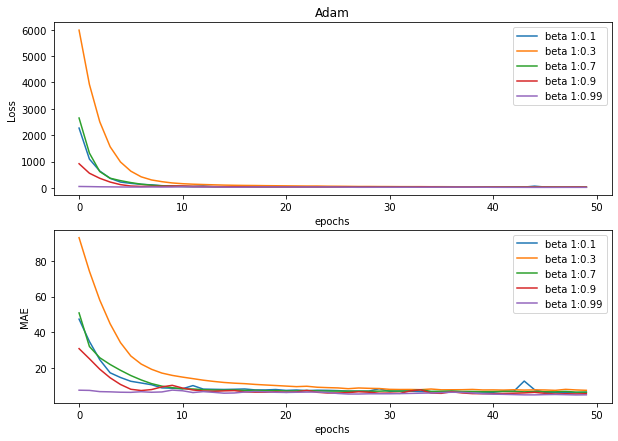

In [22]:
beta1_vals = [0.1, 0.3, 0.7, 0.9, 0.99]
plt.figure('beta1',figsize=[10,7])
for bet1 in beta1_vals:
    adam_model = MLPRegressor(solver="adam", beta_1=bet1)

    mod, errs, loss = partial_train_loop(adam_model, 50, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"beta 1:{bet1}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"beta 1:{bet1}")
plt.legend()

## adam beta 2

<ipython-input-21-fc4db6a655aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-21-fc4db6a655aa>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-21-fc4db6a655aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

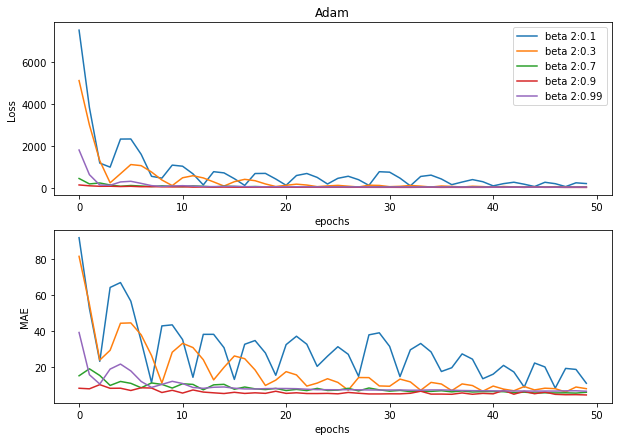

In [21]:
beta2_vals = [0.1, 0.3, 0.7, 0.9, 0.99]
plt.figure('beta2',figsize=[10,7])
for bet2 in beta2_vals:
    adam_model = MLPRegressor(solver="adam", beta_2=bet2)

    mod, errs, loss = partial_train_loop(adam_model, 50, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"beta 2:{bet2}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"beta 2:{bet2}")

## ideal batchsize

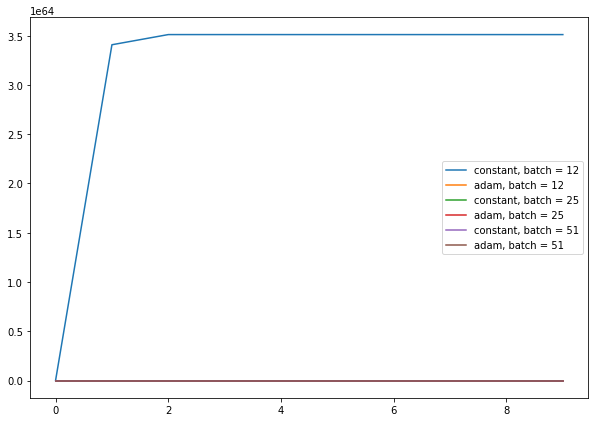

In [65]:
batch_sizes = [12,25,51 ] # default = 200
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('Batch Size Constant Step',figsize=[10,7])
for batch in batch_sizes:
    constant_model = MLPRegressor(solver="sgd", batch_size=batch, momentum=0, learning_rate_init=0.01)
    adam_model = MLPRegressor(solver="adam", batch_size=batch)
    mod, errs, loss = partial_train_loop(constant_model, 10, x_train, y_train, x_test, y_test)
    adam_mod, adam_errs, adam_loss = partial_train_loop(adam_model, 10, x_train, y_train, x_test, y_test)


    plt.plot(range(len(loss)), loss, label = f"constant, batch = {batch}")
    plt.plot(range(len(adam_loss)), adam_loss, label = f"adam, batch = {batch}")
    

plt.legend()


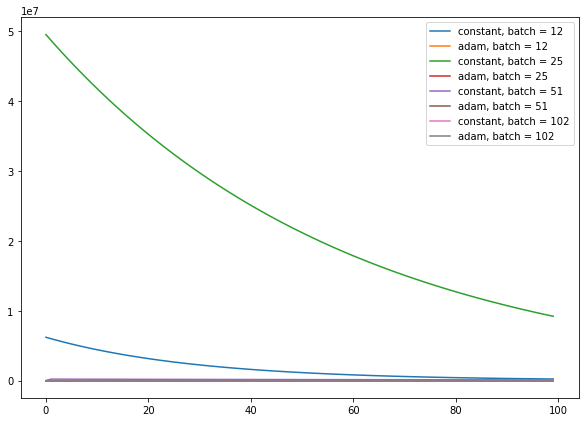

In [68]:
batch_sizes = [12, 25, 51, 102 ] # default = 200
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('Batch Size Constant Step',figsize=[10,7])
for batch in batch_sizes:
    constant_model = MLPRegressor(solver="sgd", batch_size=batch, momentum=0)
    adam_model = MLPRegressor(solver="adam", batch_size=batch)
    mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    adam_mod, adam_errs, adam_loss = partial_train_loop(adam_model, 100, x_train, y_train, x_test, y_test)


    plt.plot(range(len(errs)), errs, label = f"constant, batch = {batch}")
    plt.plot(range(len(adam_errs)), adam_errs, label = f"adam, batch = {batch}")
    

plt.legend()
